In [57]:
import numpy as np
from matplotlib import pyplot as plt
from utils import read_bin

Read CVs data

In [58]:
new_cvs_str = np.load('../CVs_data/small_nowater_strings.npy')

Read MLP model accuracy drop

In [59]:
mlp_acc_drop_all = []
a=read_bin('../MLP_results/smalldata/nowater/a_drop_mlp')
for i in range(50):
    mlp_data = a[0][i]
    mlp_data_single = np.mean(mlp_data, axis=1)*100
    mlp_acc_drop_all.append(mlp_data_single)
mlp_acc_drop = np.mean(mlp_acc_drop_all, axis=0)

Read MLP model accuracy drop

In [60]:
gbdt_fea_imp = read_bin('../GBDT_results/smalldata/nowater/feature_importances')[0]

Get the top 15 CVs of importance in the two models.

In [61]:
gbdt_top = sorted(enumerate(gbdt_fea_imp), key=lambda x:x[1])[-15:]
mlp_top = sorted(enumerate(mlp_acc_drop), key=lambda x:x[1])[:15]
topboth = []
for i in range(len(gbdt_top)):
    for j in range(len(mlp_top)):
        if gbdt_top[i][0]==mlp_top[j][0]:
            topboth.append(gbdt_top[i][0])

Obtain CVs that are important to both models

In [62]:
gbdt_shared = []
mlp_shared = []
for g in gbdt_top:
    for m in mlp_top:
        if g[0]==m[0]:
            gbdt_shared.append(g)
            mlp_shared.append(m)
gbdt_shared.sort()
mlp_shared.sort()

Draw a comparison of the importance of CVs in the two models.

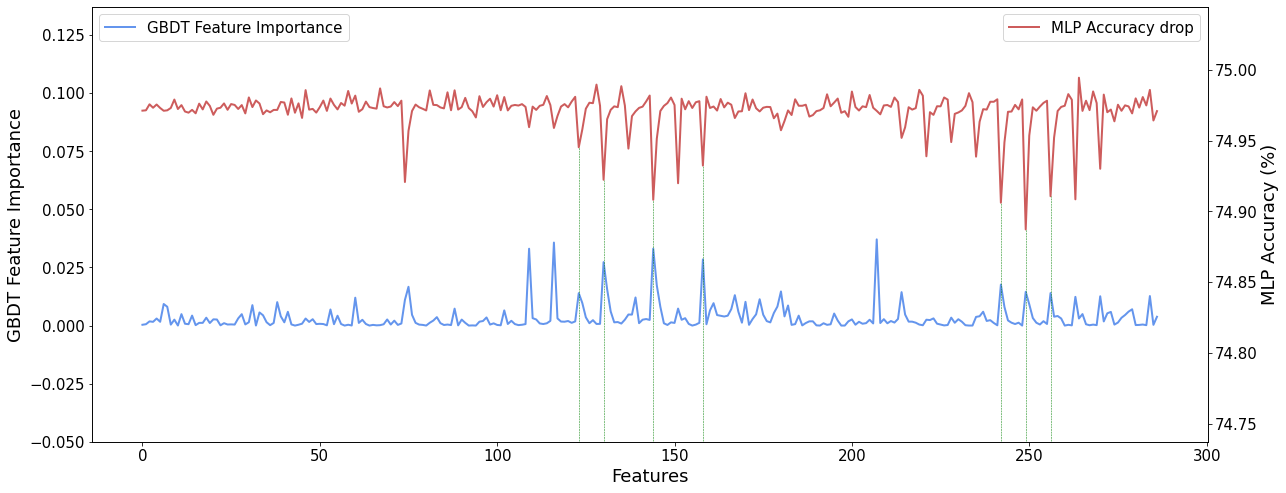

In [63]:
plt.figure(figsize=(20,8))
plt.plot(gbdt_fea_imp,linewidth=2, color='cornflowerblue', label='GBDT Feature Importance')
plt.xlabel('Features',fontsize=18)
plt.ylabel('GBDT Feature Importance',fontsize=18)
plt.legend(loc='upper left',fontsize=15)
plt.ylim(min(gbdt_fea_imp)-0.05,max(gbdt_fea_imp)+0.1)
plt.yticks(size=15)
plt.xticks(size=15)


plt.twinx()
plt.plot(mlp_acc_drop,linewidth=2, color='indianred',label='MLP Accuracy drop')
plt.ylabel('MLP Accuracy (%)',fontsize=18)
plt.ylim(min(mlp_acc_drop)-0.15,max(mlp_acc_drop)+0.05)
plt.yticks(size=15)
plt.legend(loc='upper right',fontsize=15)

for i in range(len(gbdt_shared)):
    #plt.annotate(str(round(gbdt_shared[i][1],2)),gbdt_shared[i])
    plt.annotate(str(mlp_shared[i][0]),(mlp_shared[i][0],min(mlp_acc_drop)-1.9),bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='k', lw=1, alpha=0.5))
    #plt.plot(gbdt_shared[i][0],min(gbdt_shared[i][1],mlp_shared[i][1]),marker = "o",markersize=8)
    plt.plot([mlp_shared[i][0],mlp_shared[i][0]],[min(mlp_acc_drop)-2,mlp_shared[i][1]], c='g', linestyle='--',linewidth=0.5)

Show the atoms corresponding to all filtered CVs.

In [64]:
impor_res= {}
for i in range(len(gbdt_shared)):
    cv_index = gbdt_shared[i][0]
    print(cv_index)
    cv = new_cvs_str[cv_index]
    if cv[1] not in impor_res.keys():
        impor_res[cv[1]]=1
    else:
        impor_res[cv[1]]+=1
    print(cv)

123
['resname LIG and resSeq 299 and name C18 '
 'resname HIS and resSeq 84 and name O ']
130
['resname LIG and resSeq 299 and name C19 '
 'resname HIS and resSeq 84 and name O ']
144
['resname LIG and resSeq 299 and name C21 '
 'resname HIS and resSeq 84 and name O ']
158
['resname LIG and resSeq 299 and name C23 '
 'resname HIS and resSeq 84 and name O ']
242
['resname LIG and resSeq 299 and name H35 '
 'resname HIS and resSeq 84 and name O ']
249
['resname LIG and resSeq 299 and name H36 '
 'resname HIS and resSeq 84 and name O ']
256
['resname LIG and resSeq 299 and name H37 '
 'resname HIS and resSeq 84 and name O ']


In [65]:
impor_res

{'resname HIS and resSeq 84 and name O ': 7}